## Задание на повторение:
Задание не обязательно к выполнению, но очень рекомендуется для понимания набора данных и получения гипотез для проведения валидации.

In [1]:
import pandas as pd
import datetime
import numpy as np

from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

from typing import List, Tuple

import missingno as msno

from catboost import CatBoostClassifier

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)
sns.set()
sns.set_palette('husl')


pd.options.display.max_rows=100
pd.options.display.max_columns=400

In [2]:
train = pd.read_csv('assignment_train.csv')
test = pd.read_csv('assignment_test.csv')

### Обзор данных

In [3]:
train.head(2)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [4]:
test.head(2)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3062000,0,1643492,41.0,W,9500,321.0,150.0,visa,226.0,debit,126.0,87.0,NaN,NaN,aol.com,NaN,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,50.0,2.0,104.0,104.0,0.0,317.0,0.0,NaN,NaN,NaN,NaN,317.0,NaN,NaN,NaN,NaN,317.0,NaN,NaN,NaN,M1,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,43.0,22.0,4.0,40.0,20.0,0.0,3.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,194.0,2168.0,1139.0,194.0,1965.5,991.0,0.0,202.5,148.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,20.0,0.0,0.0,0.0,4.0,44.0,0.0,20.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,194.0,2172.0,991.0,194.0,2172.0,0.0,991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3062001,1,1643513,161.0,W,6668,390.0,150.0,mastercard,224.0,debit,325.0,87.0,55.0,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,T,T,F,M0,T,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 150.3+ MB


In [6]:
print("Есть ли дубли в строках?", train.duplicated().sum())
print("Сколько процентов признаков могут принимать null-значения? %d%%" % float((train.isnull().sum() > 0).sum()/train.shape[1]*100))

Есть ли дубли в строках? 0
Сколько процентов признаков могут принимать null-значения? 80%


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 225.4+ MB


In [8]:
print("Есть ли дубли в строках?", test.duplicated().sum())
print("Сколько процентов признаков могут принимать null-значения? %d%%" % float((test.isnull().sum() > 0).sum()/test.shape[1]*100))

Есть ли дубли в строках? 0
Сколько процентов признаков могут принимать null-значения? 72%


В тестовых данных признаков, в которых присутствуют пропуски, гораздо больше.

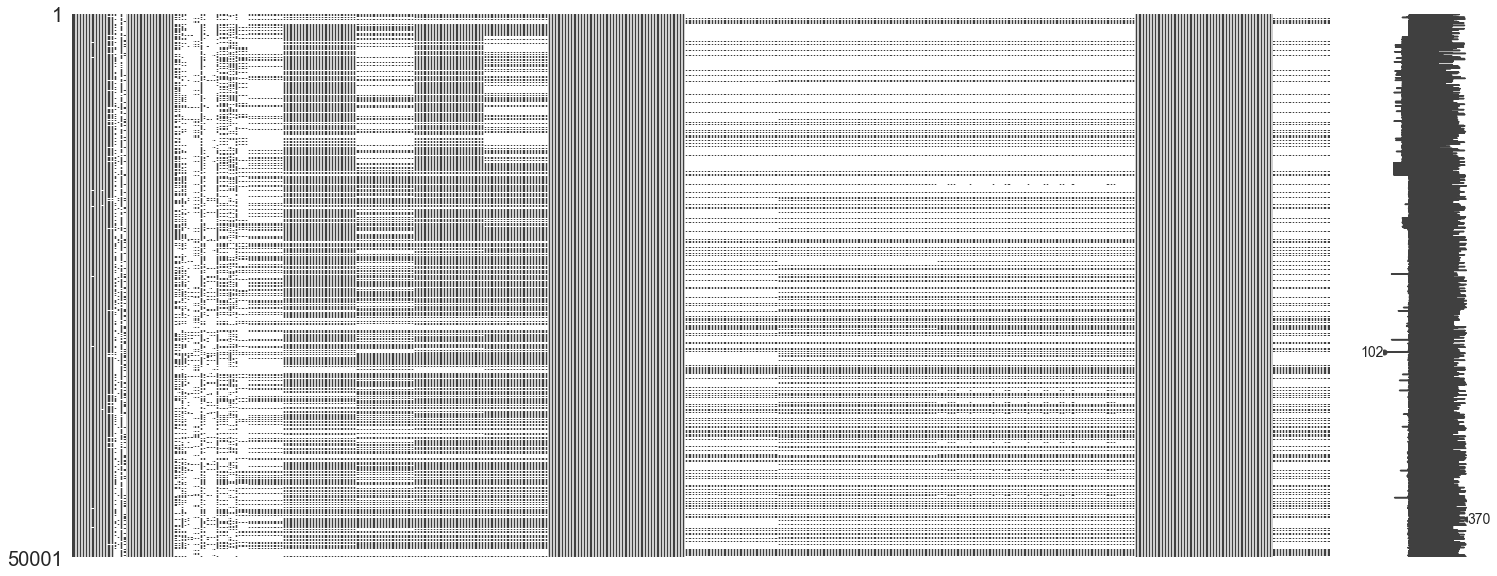

In [9]:
msno.matrix(train);

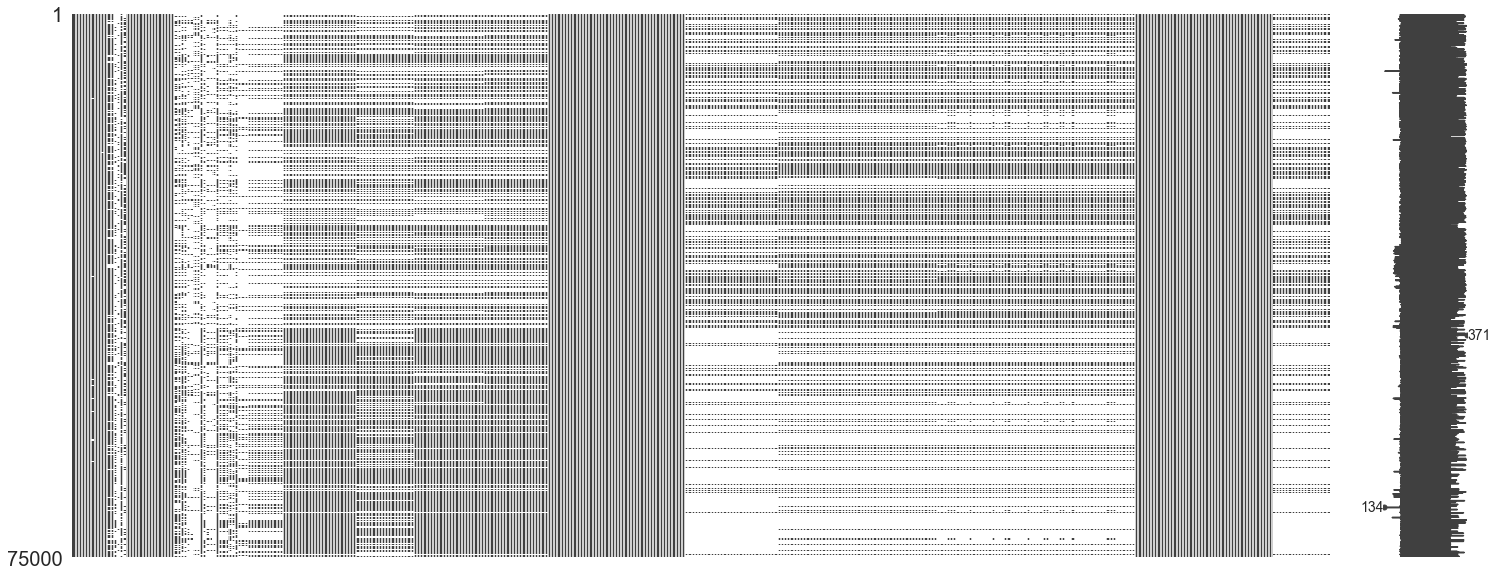

In [10]:
msno.matrix(test);

Пропуски в трейне и тесте распределены по-разному, скорее всего, признаки с большим количеством пропуском - кандидаты на удаление.

In [11]:
features_with_gaps = train.columns[train.isnull().sum() / len(train) * 100 > 50].tolist()
len(features_with_gaps)

192

In [12]:
train = train.drop(columns=features_with_gaps)
test = test.drop(columns=features_with_gaps)

### Построение списков признаков

#### Количественные признаки

In [13]:
quantitative_features = train.select_dtypes('int64').drop(columns=['TransactionID', 'isFraud']).columns.tolist()
quantitative_features

['TransactionDT', 'card1']

In [14]:
round((
    len(train[quantitative_features]) - train[quantitative_features].count()) / 
    len(train[quantitative_features]) * 100, 2).sort_values(ascending=False)

card1            0.0
TransactionDT    0.0
dtype: float64

In [15]:
train[quantitative_features].nunique().sort_values()

card1             5446
TransactionDT    48346
dtype: int64

Количественные признаки не имеют пропусков.

#### Категориальные признаки

In [16]:
cat_features = train.select_dtypes('object').columns.tolist()
cat_features

['ProductCD', 'card4', 'card6', 'P_emaildomain', 'M6']

In [17]:
round((len(train[cat_features]) - train[cat_features].count()) / len(train[cat_features]) * 100, 2).sort_values(ascending=False)

M6               37.34
P_emaildomain    17.97
card6             0.01
card4             0.01
ProductCD         0.00
dtype: float64

In [18]:
train[cat_features].nunique().sort_values()

M6                2
card4             4
card6             4
ProductCD         5
P_emaildomain    59
dtype: int64

Для пропущенных значений создадим отдельную категорию.

In [19]:
train['M6'].value_counts(), train['M6'].isnull().sum()

(F    17030
 T    14300
 Name: M6, dtype: int64,
 18671)

In [20]:
train['M6'].fillna(-1, inplace=True)
train.loc[train['M6'] == 'T', 'M6'] = 1
train.loc[train['M6'] == 'F', 'M6'] = 0

In [21]:
test['M6'].fillna(-1, inplace=True)
test.loc[test['M6'] == 'T', 'M6'] = 1
test.loc[test['M6'] == 'F', 'M6'] = 0

In [22]:
train['P_emaildomain'].value_counts(), train['P_emaildomain'].isnull().sum()

(gmail.com           17910
 yahoo.com            8360
 hotmail.com          3728
 anonymous.com        3466
 aol.com              2443
 comcast.net           849
 icloud.com            468
 msn.com               387
 outlook.com           360
 att.net               326
 sbcglobal.net         307
 verizon.net           288
 live.com              247
 ymail.com             184
 bellsouth.net         182
 cox.net               157
 charter.net           141
 me.com                134
 yahoo.com.mx          126
 optonline.net         104
 live.com.mx            71
 rocketmail.com         59
 earthlink.net          55
 gmail                  41
 mail.com               38
 roadrunner.com         38
 mac.com                37
 juno.com               33
 embarqmail.com         33
 windstream.net         32
 twc.com                30
 web.de                 29
 frontier.com           28
 netzero.com            24
 frontiernet.net        24
 cfl.rr.com             24
 outlook.es             23
 

In [23]:
train['P_emaildomain'].fillna('missing', inplace=True)

In [24]:
test['P_emaildomain'].fillna('missing', inplace=True)

#### Вещественные признаки

In [25]:
float_features = train.select_dtypes('float64').columns.tolist()
len(float_features)

193

Признаков, которые принимают вещественные значения, очень много, посмотрим на них внимательнее, возможно, не все признаки вещественные.

In [26]:
train_nunique = train[float_features].apply(lambda x: x.nunique(dropna=False))
train_nunique.shape

(193,)

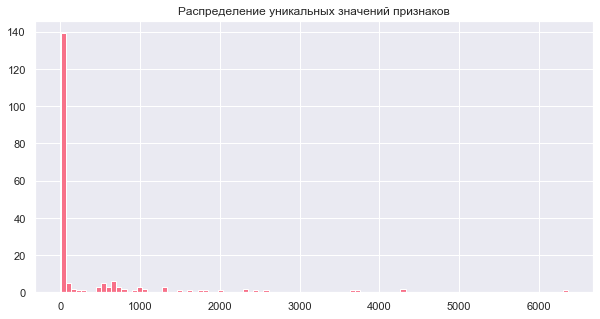

In [27]:
plt.title("Распределение уникальных значений признаков");
train_nunique.hist(bins=100, figsize=(10, 5));

In [28]:
all_features = set(train_nunique.index.tolist())
len(all_features)

193

#### Константные признаки

In [29]:
const_features = set(train_nunique[train_nunique == 1].index.tolist())
const_features

{'V107'}

In [30]:
train.loc[:5, 'V107'], test.loc[:5, 'V107']

(0    1.0
 1    1.0
 2    1.0
 3    1.0
 4    1.0
 5    1.0
 Name: V107, dtype: float64,
 0    1.0
 1    1.0
 2    1.0
 3    1.0
 4    1.0
 5    1.0
 Name: V107, dtype: float64)

In [31]:
train['V107'].isnull().sum()

0

Константный признак не будем использовать для модели.

#### Вещественные признаки

In [32]:
numeric_features = (train[float_features].fillna(0).astype(int).sum() - train[float_features].fillna(0).sum()).abs()
numeric_features = set(numeric_features[numeric_features > 0].index.tolist())
len(numeric_features)

29

In [33]:
other = all_features - (numeric_features | const_features)
len(other)

163

#### Бинарные

In [34]:
binary_features = set(train[float_features].loc[:, other].columns[(
                      (train[float_features].loc[:, other].max() == 1) & \
                      (train[float_features].loc[:, other].min() == 0) & \
                      (train[float_features].loc[:, other].isnull().sum() == 0))])
len(binary_features)

0

Бинарных признаков нет.

In [35]:
numeric_features = numeric_features | other

In [36]:
other = other - numeric_features
len(other)

0

Таким образом мы выделили четыре типа данных в наших выборках: целочисленные, категориальные, вещественые и один константный.

In [37]:
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

### Задание 1: 
Построить график распределения времени совершения транзакции для обучающей / тестовой выборки, сделать выводы о том, как разбиты данные и какие виды валидации могут подойти для данной задачи.

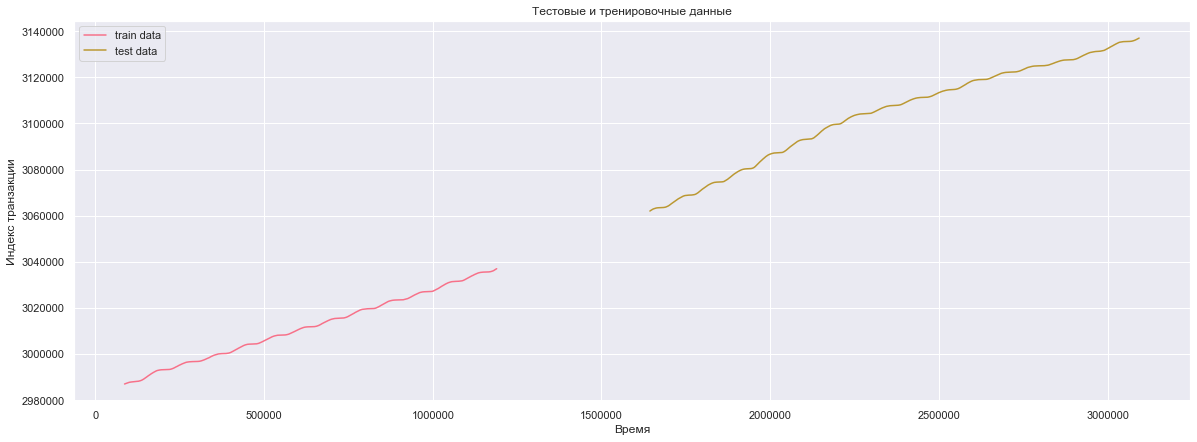

In [38]:
plt.figure(figsize=(20, 7))
plt.xlabel('Время')
plt.ylabel('Индекс транзакции')
plt.plot(train['TransactionDT'], train['TransactionID'], label='train data' )
plt.plot(test['TransactionDT'], test['TransactionID'], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

Модель обучалась на более ранних данных, транзакции разные.

### Задание 2: 
построить scatter-plot зависимости суммы транзакции от времени совершения транзакции. Построить графики для обучающей выборки и для тестовой выборки, для обучающей выборки - построить как для целевой переменной = 0, так и для переменной = 1. Сделать выводы.

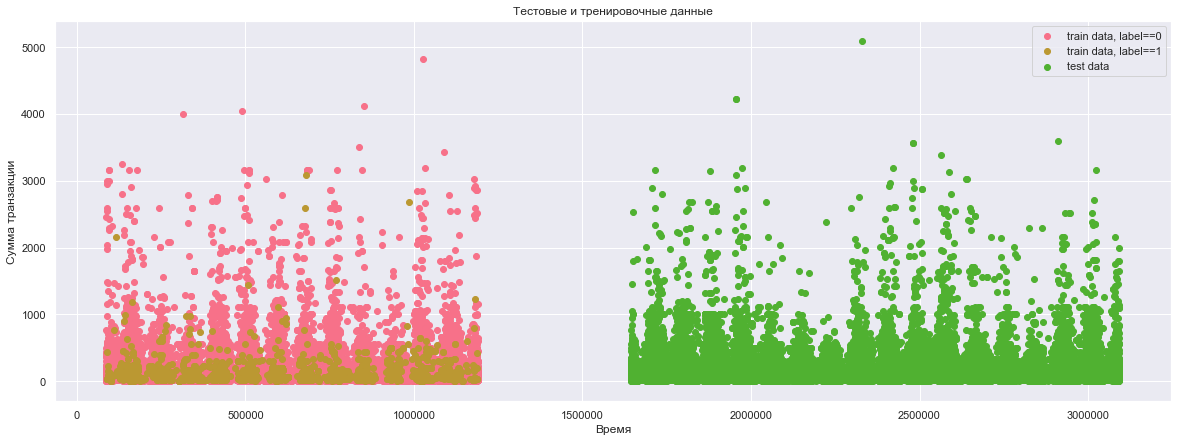

In [39]:
train_t0 = train.loc[train['isFraud'] == 0]
train_t1 = train.loc[train['isFraud'] == 1]
plt.figure(figsize=(20, 7))
plt.xlabel('Время')
plt.ylabel('Сумма транзакции')
plt.scatter(train_t0['TransactionDT'], train_t0['TransactionAmt'], label='train data, label==0')
plt.scatter(train_t1['TransactionDT'], train_t1['TransactionAmt'], label='train data, label==1')
plt.scatter(test['TransactionDT'], test['TransactionAmt'], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

Суммы мошеннических транзакций ниже обычных.

Задание 3: построить распределение признака TransactionAmt в логарифмическом масштабе, сделать выводы о близости распредления к нормальному распределению. Построить распределение признака в логарифмическому масштабе для обучающей выборк и для тестовой выборки, сделать выводы.

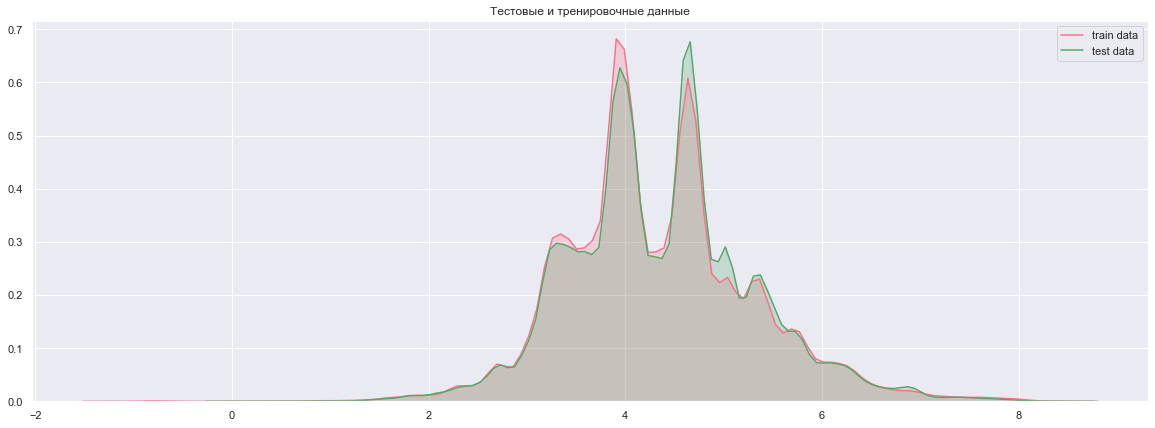

In [40]:
plt.figure(figsize=(20, 7))
sns.kdeplot(np.log(train['TransactionAmt']), shade=True, label='train data')
sns.kdeplot(np.log(test['TransactionAmt']), shade=True, label='test data', color='g')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

Распределение признака мало похоже на нормальное.

Задание 4: построить распределение признака целевой переменной в зависимости от значений категориальных признаков ProductCD, card4, card6. Сделать выводы.

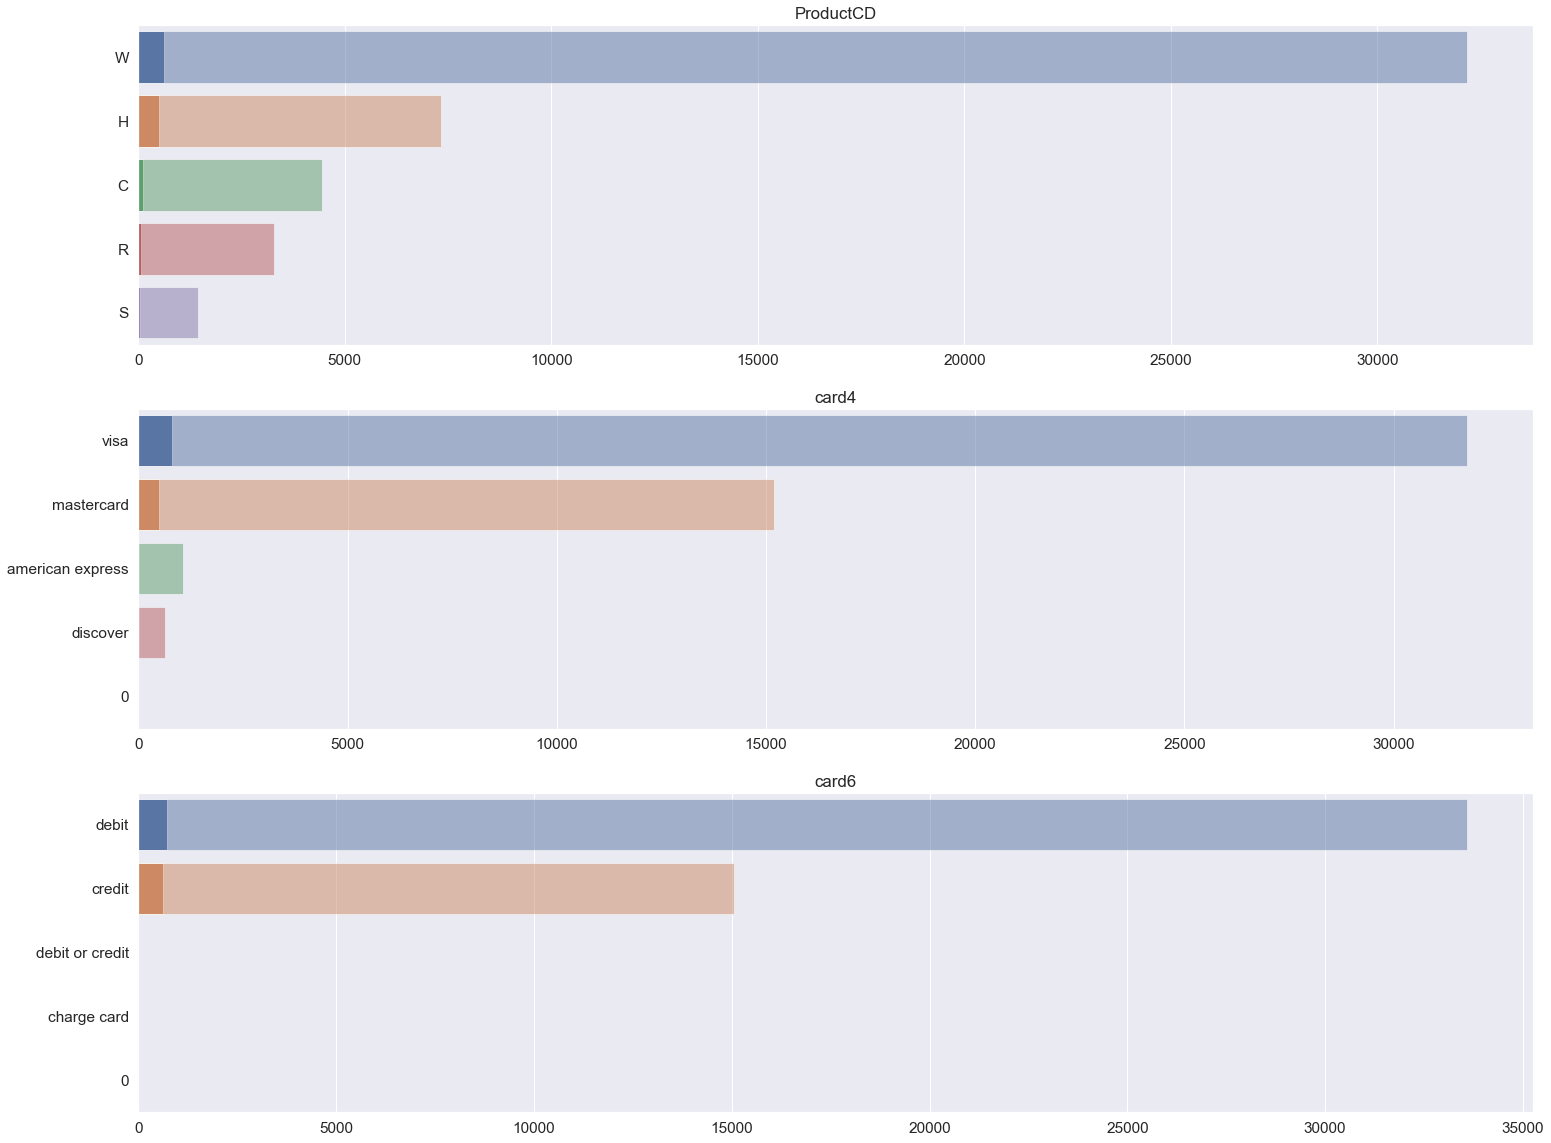

In [41]:
sns.set(font_scale=1.4)
plt.figure(figsize=(25,20))

for i, colname in enumerate(['ProductCD', 'card4', 'card6']):
    plt.subplot(3,1,i+1)
    plt.title(colname)
    
    val_counts_t1 = train.loc[train['isFraud'] == 1, colname].value_counts()
    val_counts_t0 = train.loc[train['isFraud'] == 0, colname].value_counts()
    
    sns.barplot(val_counts_t1.values, val_counts_t1.index)
    sns.barplot(val_counts_t0.values, val_counts_t0.index, alpha=0.5)
    
plt.show()

Из графика видно, что мы можем сократить количество категорий в каждом из признаков.

## Основное задание:
Даны выборки для обучения и для тестирования. Задание заключается в том, чтобы попробовать разные способы валидации, проанализировать плюсы / минусы каждой и сделать выводы о том, какой способ валидации наиболее устойчивый в данной задаче. Метрика качества для оценки прогнозов - ROC-AUC, название целевой переменной - IsFraud. Рекомендуется использовать модели градиетного бустинга, реализация любая.

### Задание 1: 
сделать Hold-Out валидацию с разбиением, размер которого будет адеквтаным, по вашему мнению; разбиение проводить по id-транзакции (TransactionID), обучать модель градиетного бустинга любой реализации с подбором числа деревьев по early_stopping критерию до достижения сходимости. Оценить качество модели на тестовой выборке, оценить расхождение по сравнению с качеством на обучающей выборке и тестовой выборке.

In [42]:
X, y = train.sort_values(by='TransactionID')[
    quantitative_features + cat_features + list(numeric_features)
], train.sort_values(by='TransactionID')['isFraud']

In [43]:
X_train, y_train, X_test, y_test = X[:45000], y[:45000], X[45001:], y[45001:]

In [44]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((45000, 199), (45000,), (5000, 199), (5000,))

In [45]:
model = CatBoostClassifier(early_stopping_rounds=10,
                           loss_function='Logloss',
                           cat_features=cat_features,
                          silent=True)

model.fit(X_train, y_train)

In [46]:
preds_proba = model.predict_proba(X_test)
roc_auc_score(y_test, preds_proba[:,1])

0.9006838699678407

In [47]:
preds_proba = model.predict_proba(test[quantitative_features + cat_features + list(numeric_features)])
roc_auc_score(test['isFraud'], preds_proba[:,1])

0.8635572178564597

Результат на тесте ниже, чем на валидации.

### Задание 2: 
сделать Hold-Out валидацию с разбиением на 3 выборки, разбиение проводить по id-транзакции (TransactionID), размер каждой выборки подобрать самостоятельно. Повторить процедуру из п.1.

In [48]:
X_train, y_train, X_val, y_val, X_test, y_test = X[:40000], y[:40000], X[40001:45000], y[40001:45000], X[45001:], y[45001:]

In [49]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((40000, 199), (40000,), (4999, 199), (4999,), (5000, 199), (5000,))

In [50]:
model = CatBoostClassifier(early_stopping_rounds=10,
                           loss_function='Logloss',
                           cat_features=cat_features,
                          silent=True)

model.fit(X_train, y_train)

In [51]:
preds_proba = model.predict_proba(X_val)
roc_auc_score(y_val, preds_proba[:,1])

0.9121781668383111

In [52]:
preds_proba = model.predict_proba(X_test)
roc_auc_score(y_test, preds_proba[:,1])

0.8664467821302647

In [53]:
preds_proba = model.predict_proba(test[quantitative_features + cat_features + list(numeric_features)])
roc_auc_score(test['isFraud'], preds_proba[:,1])

0.8691736848641247

Качество на тесте выросло.

### Задание 3: 
построить доверительный интервал на данных из п.2 на основе бутстреп выборок, оценить качество модели на тестовом выборке относительно полученного доверительного интервала. Сделать выводы.

In [54]:
def create_bootstrap_samples(data: np.array, n_samples: int = 1000) -> np.array:
    """
    Создание бутстреп-выборок.

    Parameters
    ----------
    data: np.array
        Исходная выборка, которая будет использоваться для
        создания бутстреп выборок.

    n_samples: int, optional, default = 1000
        Количество создаваемых бутстреп выборок.
        Опциональный параметр, по умолчанию, равен 1000.

    Returns
    -------
    bootstrap_idx: np.array
        Матрица индексов, для создания бутстреп выборок.

    """
    bootstrap_idx = np.random.randint(
        low=0, high=len(data), size=(n_samples, len(data))
    )
    return bootstrap_idx

def create_bootstrap_metrics(y_true: np.array,
                             y_pred: np.array,
                             metric: callable,
                             n_samlpes: int = 1000) -> List[float]:
    """
    Вычисление бутстреп оценок.

    Parameters
    ----------
    y_true: np.array
        Вектор целевой переменной.

    y_pred: np.array
        Вектор прогнозов.

    metric: callable
        Функция для вычисления метрики.
        Функция должна принимать 2 аргумента: y_true, y_pred.

    n_samples: int, optional, default = 1000
        Количество создаваемых бутстреп выборок.
        Опциональный параметр, по умолчанию, равен 1000.

    Returns
    -------
    bootstrap_metrics: List[float]
        Список со значениями метрики качества на каждой бустреп выборке.

    """
    scores = []

    if isinstance(y_true, pd.Series):
        y_true = y_true.values

    bootstrap_idx = create_bootstrap_samples(y_true)
    for idx in bootstrap_idx:
        y_true_bootstrap = y_true[idx]
        y_pred_bootstrap = y_pred[idx]

        score = metric(y_true_bootstrap, y_pred_bootstrap)
        scores.append(score)

    return scores


def calculate_confidence_interval(scores: list, conf_interval: float = 0.95) -> Tuple[float]:
    """
    Вычисление доверительного интервала.

    Parameters
    ----------
    scores: List[float / int]
        Список с оценками изучаемой величины.

    conf_interval: float, optional, default = 0.95
        Уровень доверия для построения интервала.
        Опциональный параметр, по умолчанию, равен 0.95.

    Returns
    -------
    conf_interval: Tuple[float]
        Кортеж с границами доверительного интервала.

    """
    left_bound = np.percentile(
        scores, ((1 - conf_interval) / 2) * 100
    )
    right_bound = np.percentile(
        scores, (conf_interval + ((1 - conf_interval) / 2)) * 100
    )

    return left_bound, right_bound

In [55]:
np.random.seed(27)
scores = create_bootstrap_metrics(y_val, model.predict_proba(X_val)[:, 1], roc_auc_score)

calculate_confidence_interval(scores)

(0.8797331629530984, 0.9410772169622647)

In [56]:
np.random.seed(27)
scores = create_bootstrap_metrics(y_test, model.predict_proba(X_test)[:, 1], roc_auc_score)

calculate_confidence_interval(scores)

(0.8176639441136833, 0.9143442829928774)

In [57]:
np.random.seed(27)
scores = create_bootstrap_metrics(test['isFraud'], model.predict_proba(
    test[quantitative_features + cat_features + list(numeric_features)])[:, 1], roc_auc_score)

calculate_confidence_interval(scores)

(0.8597930417057527, 0.8781220767397069)

Доверительный интервал на тесте довольно небольшой, и предыдущие оценки попадают в него, таким образом, можно сказать, что модель неплохо предсказывает.

### Задание 4: 
выполнить Adversarial Validation на основе данных из обучения / теста, подобрать объема из обучающей выборки, которые сильно похожи на объекты из тестовой выборки, и использовать их в качестве валидационного набора. Сделать выводы о полученных результатах.

In [58]:
y_train = train['isFraud'].copy()
X_train = train[quantitative_features + cat_features + list(numeric_features)].copy().drop(columns='TransactionDT')

y_test = test['isFraud'].copy()
X_test = test[quantitative_features + cat_features + list(numeric_features)].copy().drop(columns='TransactionDT')

In [59]:
x_adv = pd.concat([
    X_train, X_test], axis=0)
y_adv = np.hstack((np.zeros(X_train.shape[0]), np.ones(X_test.shape[0])))
assert x_adv.shape[0] == y_adv.shape[0]

In [60]:
model = CatBoostClassifier(n_estimators=5, cat_features=cat_features)
model.fit(x_adv, y_adv)

Learning rate set to 0.5
0:	learn: 0.5663615	total: 57ms	remaining: 228ms
1:	learn: 0.5391892	total: 114ms	remaining: 172ms
2:	learn: 0.5305242	total: 185ms	remaining: 123ms
3:	learn: 0.5249782	total: 265ms	remaining: 66.3ms
4:	learn: 0.5209179	total: 338ms	remaining: 0us


In [61]:
y_pred = model.predict_proba(X_train)

In [62]:
pd.cut(
    y_pred[:, 1], bins=np.arange(0, 1.01, 0.1)
).value_counts().sort_index()

(0.0, 0.1]     7950
(0.1, 0.2]     3728
(0.2, 0.3]     3766
(0.3, 0.4]     2026
(0.4, 0.5]     3670
(0.5, 0.6]    12093
(0.6, 0.7]    10487
(0.7, 0.8]     4686
(0.8, 0.9]     1242
(0.9, 1.0]      353
dtype: int64

In [63]:
train['proba'] = y_pred[:, 1]
train = train.loc[train['proba'] > 0.6]

y_train = train['isFraud'].copy()
X_train = train[quantitative_features + cat_features + list(numeric_features)].copy().drop(columns='TransactionDT')

In [64]:
model = CatBoostClassifier(early_stopping_rounds=10,
                           loss_function='Logloss',
                           cat_features=cat_features,
                          silent=True)

model.fit(X_train, y_train)

In [65]:
preds_proba = model.predict_proba(X_test)
roc_auc_score(y_test, preds_proba[:,1])

0.8689315997065914

Результат почти не отличается от hold-out валидации.

### Задание 5: 
сделать KFold / StratifiedKFold валидацию (на ваше усмотрение), оценить получаемые качество и разброс по метрике качества. Сделать выводы об устойчивости кросс-валидации, сходимости оценки на кросс-валидации и отложенном наборе данных;

In [66]:
y_train = train['isFraud'].copy()
X_train = train[quantitative_features + cat_features + list(numeric_features)].copy().drop(columns='TransactionDT')

y_test = test['isFraud'].copy()
X_test = test[quantitative_features + cat_features + list(numeric_features)].copy().drop(columns='TransactionDT')

In [67]:
model = CatBoostClassifier(early_stopping_rounds=10,
                           loss_function='Logloss',
                           cat_features=cat_features,
                          silent=True)

In [68]:
cv = cross_val_score(
    estimator=model,
    X=X_train,
    y=y_train,
    scoring="roc_auc",
    cv=5
)

print(f"CV-results: {round(np.mean(cv), 4)} +/- {round(np.std(cv), 3)}")

CV-results: 0.8894 +/- 0.008


Кросс-валидация показала лучший результат, разброс оценки довольно небольшой.

### Задание 6 * 
(опциональное): сделать Hold-Out валидацию по времени (TransactionDT), повторить процедуры из п.1 / п.2 (на ваш выбор). Построить доверительный интервал, сравнить качество на тестовой выборке с полученным доверительным интервалом. Сделать выводы.

Задание 7 ** (совсем опциональное): в данном наборе данных у нас есть ID-транзакции (TransactionID) и время транзакции (TransactionDT), но отсутствует ID-клиента, который совершал транзакции. Кажется, что в этой задаче валидация по клиенту работала бы хорошо. Предложить критерий, по которому можно выделить клиентов и сделать п.5, используя созданное определение клиента, используя валидацию по клиенту (GroupKFold).